# City of Chicago Crimes

In [1]:
import pandas as pd
import os
from pathlib import Path
import Data
import coordinates

In [2]:
currpath = os.getcwd()
mypath = Path().absolute().parent # each '.parent' goes one level up - vary as required
#print(mypath)
#os.chdir(mypath)
os.chdir(os.path.dirname(os.path.abspath("crimes.csv")))
print(Path().absolute())

C:\Users\chloe\OneDrive\AY2024 FYP\FYP-Code\FYP-Spatial-Analytics


## Data Package Introduction

In [3]:
df = pd.read_csv("Data/crimes.csv")
df.describe()

,ID,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,4.993170e+05,499317.000000,499304.000000,499317.000000,4.950860e+05,4.950860e+05,499317.000000,495086.000000,495086.000000
mean,1.292516e+07,11.318767,23.251969,36.274527,1.165355e+06,1.887202e+06,2022.521645,41.846062,-87.668691
std,7.028720e+05,7.098315,14.106800,21.562981,1.655756e+04,3.200432e+04,0.499892,0.088021,0.060218
min,2.654300e+04,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,2022.000000,36.619446,-91.686566
25%,1.277560e+07,5.000000,10.000000,22.000000,1.153938e+06,1.859491e+06,2022.000000,41.769868,-87.710210
50%,1.295900e+07,10.000000,24.000000,32.000000,1.167163e+06,1.893471e+06,2023.000000,41.863375,-87.661857
75%,1.314454e+07,17.000000,34.000000,53.000000,1.176816e+06,1.910237e+06,2023.000000,41.909616,-87.626649
max,1.334356e+07,31.000000,50.000000,77.000000,1.205119e+06,1.951506e+06,2024.000000,42.022549,-87.524532


In [4]:
df

,ID,Case Number,Date,Primary Type,Description,Arrest,Domestic,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13325102,JH100383,01/01/2024 12:35:00 AM,CRIMINAL DAMAGE,TO VEHICLE,False,False,19,46.0,3,14,1166300.0,1930873.0,2024,01/09/2024 03:40:58 PM,41.965895,-87.663930,"(41.965894533, -87.663929744)"
1,13324869,JH100080,01/01/2024 12:32:00 AM,BATTERY,DOMESTIC BATTERY SIMPLE,True,True,18,42.0,8,08B,1178425.0,1903153.0,2024,01/09/2024 03:40:58 PM,41.889561,-87.620197,"(41.889561428, -87.620196651)"
2,13334424,JH111086,01/01/2024 12:30:00 AM,OFFENSE INVOLVING CHILDREN,OTHER OFFENSE,False,True,8,17.0,66,20,1154757.0,1855327.0,2024,01/12/2024 03:40:16 PM,41.758828,-87.708393,"(41.758827609, -87.708393124)"
3,13330629,JH106692,01/01/2024 12:30:00 AM,CRIMINAL DAMAGE,TO VEHICLE,False,False,10,24.0,30,14,1156023.0,1889423.0,2024,01/09/2024 03:40:58 PM,41.852366,-87.702837,"(41.852366315, -87.702836579)"
4,13324809,JH100033,01/01/2024 12:30:00 AM,BATTERY,SIMPLE,False,False,17,39.0,13,08B,1155076.0,1934388.0,2024,01/09/2024 03:40:58 PM,41.975773,-87.705103,"(41.975773105, -87.705103499)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499312,12591578,JF111765,01/01/2022 12:50:00 AM,BATTERY,DOMESTIC BATTERY SIMPLE,False,True,9,14.0,58,08B,1156148.0,1873804.0,2022,01/03/2023 03:40:27 PM,41.809503,-87.702799,"(41.809503342, -87.702798559)"
499313,12581825,JF100053,01/01/2022 12:50:00 AM,CRIMINAL DAMAGE,TO PROPERTY,False,False,6,6.0,44,14,1182123.0,1850775.0,2022,01/03/2023 03:40:27 PM,41.745747,-87.608239,"(41.745747124, -87.608239392)"
499314,12581804,JF100047,01/01/2022 12:48:00 AM,BATTERY,DOMESTIC BATTERY SIMPLE,True,True,19,44.0,6,08B,1168046.0,1921748.0,2022,01/03/2023 03:40:27 PM,41.940818,-87.657775,"(41.940817562, -87.657774548)"
499315,12585133,JF104070,01/01/2022 12:48:00 AM,DECEPTIVE PRACTICE,ATTEMPT - FINANCIAL IDENTITY THEFT,False,True,25,31.0,19,11,1143288.0,1916670.0,2022,01/03/2023 03:40:27 PM,41.927382,-87.748897,"(41.927382386, -87.748897111)"


In [5]:
# Filter rows where PrimaryType is 'CRIMINAL DAMAGE' and Description is 'TO VEHICLE'
df_1 = df[(df['Primary Type'] == 'CRIMINAL DAMAGE') &
                        (df['Description'] == 'TO VEHICLE')]

# Group by Latitude and Longitude, count occurrences, and join with df_1
df_2 = (df_1.groupby(['Latitude', 'Longitude'])
          .size()
          .reset_index(name='n')
          .merge(df_1, on=['Latitude', 'Longitude'])
          .drop_duplicates(subset=['Latitude', 'Longitude'], keep='first')
          .loc[:, ['Latitude', 'Longitude', 'n']]
          .assign(location_id=lambda x: x.groupby(['Latitude', 'Longitude']).ngroup() + 1))

# Display the resulting DataFrame
print(df_2)

        Latitude  Longitude  n  location_id
0      41.644590 -87.615880  1            1
1      41.647037 -87.616647  1            2
2      41.647039 -87.616098  2            3
4      41.647180 -87.544241  1            4
5      41.647716 -87.542811  1            5
...          ...        ... ..          ...
30992  42.022526 -87.672401  1        25450
30993  42.022529 -87.666324  1        25451
30994  42.022535 -87.673398  2        25452
30996  42.022536 -87.673711  1        25453
30997  42.022548 -87.676139  1        25454

[25454 rows x 4 columns]


## Remove missing values

In [6]:
crimes_df = df_2.copy()
missing_values = crimes_df.isnull().sum()
print(missing_values)

Latitude       0
Longitude      0
n              0
location_id    0
dtype: int64


Since there are no missing values, no processing is needed here. 

In [11]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np
import shapely
import seaborn as sns

In [7]:
crimes_df.describe()

,Latitude,Longitude,n,location_id
count,25454.000000,25454.000000,25454.000000,25454.000000
mean,41.838825,-87.668302,1.217805,12727.500000
std,0.088466,0.058705,0.912950,7348.081212
min,41.644590,-87.915105,1.000000,1.000000
25%,41.763600,-87.710031,1.000000,6364.250000
50%,41.846656,-87.665186,1.000000,12727.500000
75%,41.906683,-87.625783,1.000000,19090.750000
max,42.022548,-87.525270,31.000000,25454.000000


In [30]:
selected_variable = 'n'  # Replace 'desired_column' with the column you want to analyze

# Count the frequency of each distinct value
value_counts = crimes_df[selected_variable].value_counts().sort_index()

# Create a new DataFrame with the frequency information
frequency_df = pd.DataFrame({
    'Value': value_counts.index,
    'Frequency': value_counts.values,
    'Percentage':((value_counts.values)/len(crimes_df)) * 100
})

# Display the new DataFrame
frequency_df

,Value,Frequency,Percentage
0,1,22244,87.389015
1,2,2266,8.902334
2,3,523,2.054687
3,4,186,0.730730
4,5,72,0.282863
5,6,45,0.176790
6,7,27,0.106074
7,8,20,0.078573
8,9,19,0.074644
9,10,9,0.035358


In [31]:
crimes_df.to_csv('crimes_processed.csv', index=False)

<Axes: xlabel='n', ylabel='Count'>

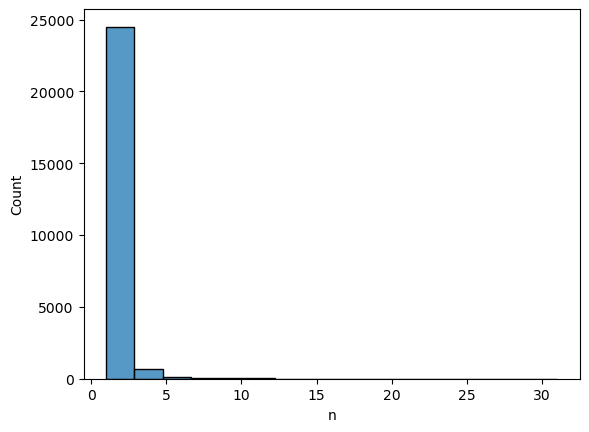

In [15]:
sns.histplot(x=crimes_df['n'])

## Plottig Spatial distributions of crimes

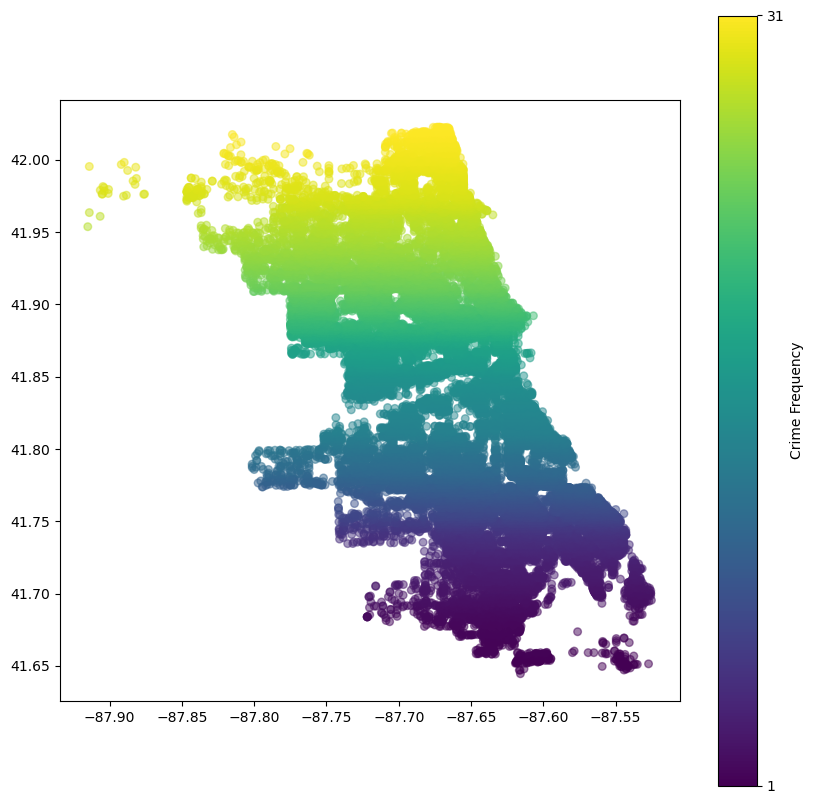

In [23]:
from shapely.geometry import Point
import matplotlib.cm as cm
import matplotlib.colors as colors

n_values = crimes_df['n']

# Create a GeoDataFrame from the 'meuse' DataFrame
geometry = [Point(xy) for xy in zip(crimes_df['Longitude'], crimes_df['Latitude'])]
geo_df = gpd.GeoDataFrame(crimes_df, geometry=geometry)

# Plot the spatial distribution of zinc concentrations with colors based on zinc values
fig, ax = plt.subplots(figsize=(10, 10))
scatter_plot = geo_df.plot(ax=ax, marker='o', c=n_values, cmap='viridis', markersize=30, alpha=0.5, legend=True)

# Create a ScalarMappable to map zinc values to colors
norm = colors.Normalize(vmin=n_values.min(), vmax=n_values.max())
sm = cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])

# Add colorbar for zinc concentrations using ScalarMappable
cbar = plt.colorbar(sm, ax=ax, label='Crime Frequency')

# Set ticks on the colorbar
cbar.set_ticks([n_values.min(), n_values.max()])

# Display the plot
plt.show()
